# Data Processing

In [1]:
! python spotify_data_processing.py

Processed data saved to C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\datasets\cleaned_data\spotify_v1/train.csv
Processed data saved to C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\datasets\cleaned_data\spotify_v1/test.csv


In [1]:
import sys
from pathlib import Path
from train import train_model, hyper_parameter_tuning
from neural_network_trainer import NeuralNetworkTrainer
import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

# ML Training

In [17]:
project_root = Path.cwd().parent
sys.path.append(str(project_root))

config_path = project_root / "configs" / "xgboost_spotify.yaml"
train_model(config_path)

Loading training data from C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\datasets\cleaned_data\spotify_v1\train.csv...
Loading test data from C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\datasets\cleaned_data\spotify_v1\test.csv...
Initializing the xgboost model...
Training the model...
Evaluating the model...
XGBOOST Model Accuracy: 0.6649214659685864
              precision    recall  f1-score   support

           0       0.61      0.64      0.62        83
           1       0.71      0.69      0.70       108

    accuracy                           0.66       191
   macro avg       0.66      0.66      0.66       191
weighted avg       0.67      0.66      0.67       191

XGBOOST F1 Score: 0.6981132075471698
Evaluation results saved to C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\results\spotify_xgboost_results.json
XGBOOST Model saved to C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\model_checkpoints\xgboost_model.pkl


# ML Debug

Loading training data from C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\datasets\cleaned_data\spotify_v1\train.csv...
Loading test data from C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\datasets\cleaned_data\spotify_v1\test.csv...
Initializing the xgboost model...


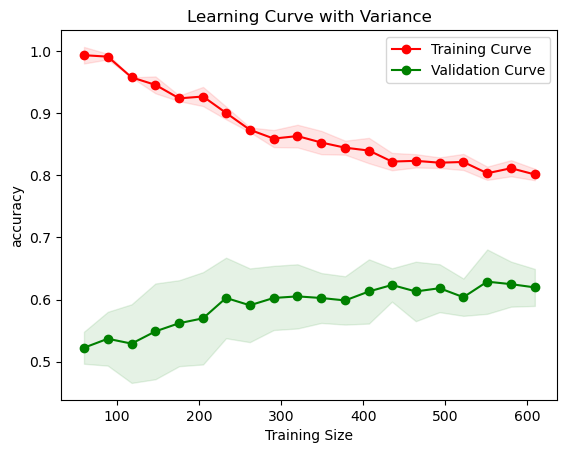

In [40]:
project_root = Path.cwd().parent
sys.path.append(str(project_root))

config_path = project_root / "configs" / "xgboost_spotify.yaml"
train_model(config_path, debug=True)

# Validation Curve

In [45]:
param_grids = {
        # "knn": {
        #     "n_neighbors": [3, 5, 7, 9, 12, 15, 20, 30, 40]
        # },
        # "svm": {
        #     "kernel": ["rbf"],
        #     "C": [0.1, 0.5, 1, 3, 5, 10],
        #     "gamma": ["scale", "auto", 0.2, 0.8]
        # },
        "xgboost": {
            # "n_estimators": [100, 200, 300],
            "learning_rate": [0.01, 0.05, 0.1, 0.2],
            # "max_depth": [1, 2, 3, 6, 9, 12, 15], 
            # "subsample": [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1],
            # "min_samples_leaf": [1, 5, 10, 15, 20]
        }
    }

Loading training data from C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\datasets\cleaned_data\spotify_v1\train.csv...
Loading test data from C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\datasets\cleaned_data\spotify_v1\test.csv...
Initializing the xgboost model for hyperparameter tuning...
Performing hyperparameter tuning...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best hyperparameters: {'learning_rate': 0.05}
Best cross-validation accuracy: 0.6377952755905512
Retraining the model with the best hyperparameters...
Evaluating the best model on the test set...
XGBOOST Model Accuracy: 0.6178010471204188
              precision    recall  f1-score   support

           0       0.55      0.65      0.60        83
           1       0.69      0.59      0.64       108

    accuracy                           0.62       191
   macro avg       0.62      0.62      0.62       191
weighted avg       0.63      0.62      0.62       191

XGBOOST F1 Score: 0.6

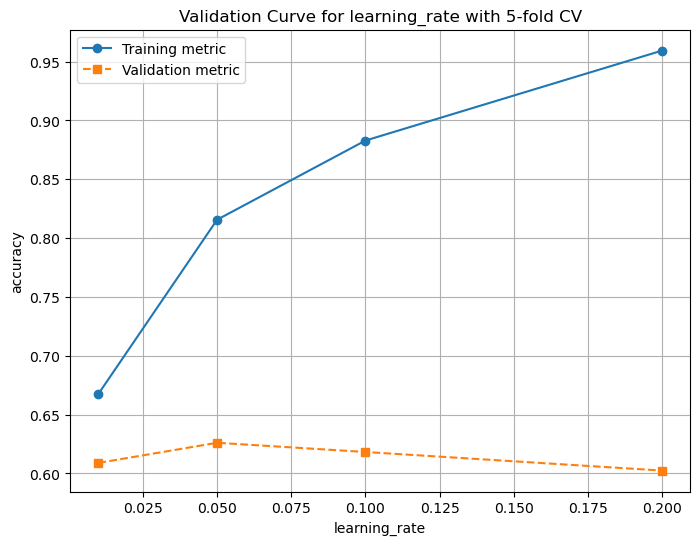

(GradientBoostingModel(learning_rate=0.05),
 {'learning_rate': 0.05},
 0.6377952755905512)

In [46]:
project_root = Path.cwd().parent
sys.path.append(str(project_root)) 

config_path = project_root / "configs" / "xgboost_spotify.yaml"
hyper_parameter_tuning(config_path, param_grids, "grid", validation_curve=True, param_name="learning_rate")

# Neural Network Training

In [11]:
project_root = Path.cwd().parent
sys.path.append(str(project_root)) 
config_path = project_root / "configs" / "nn_spotify.yaml"

trainer = NeuralNetworkTrainer(config_path=config_path, device="cuda")
trainer.train_and_evaluate()

Loading training data...
Loading test data...
Initializing model...
Training model...
Epoch 1/20, Loss: 0.7086
Epoch 2/20, Loss: 0.7055
Epoch 3/20, Loss: 0.7021
Epoch 4/20, Loss: 0.6933
Epoch 5/20, Loss: 0.6915
Epoch 6/20, Loss: 0.6721
Epoch 7/20, Loss: 0.6761
Epoch 8/20, Loss: 0.6576
Epoch 9/20, Loss: 0.6619
Epoch 10/20, Loss: 0.6517
Epoch 11/20, Loss: 0.6565
Epoch 12/20, Loss: 0.6444
Epoch 13/20, Loss: 0.6418
Epoch 14/20, Loss: 0.6448
Epoch 15/20, Loss: 0.6517
Epoch 16/20, Loss: 0.6394
Epoch 17/20, Loss: 0.6503
Epoch 18/20, Loss: 0.6447
Epoch 19/20, Loss: 0.6275
Epoch 20/20, Loss: 0.6448
Evaluating model...
{'0': {'f1-score': 0.6144578313253012,
       'precision': 0.6144578313253012,
       'recall': 0.6144578313253012,
       'support': 83.0},
 '1': {'f1-score': 0.7037037037037037,
       'precision': 0.7037037037037037,
       'recall': 0.7037037037037037,
       'support': 108.0},
 'accuracy': 0.6649214659685864,
 'macro avg': {'f1-score': 0.6590807675145025,
               'prec

# Neural Network Debug

Loading training data...
Loading test data...
Initializing model...


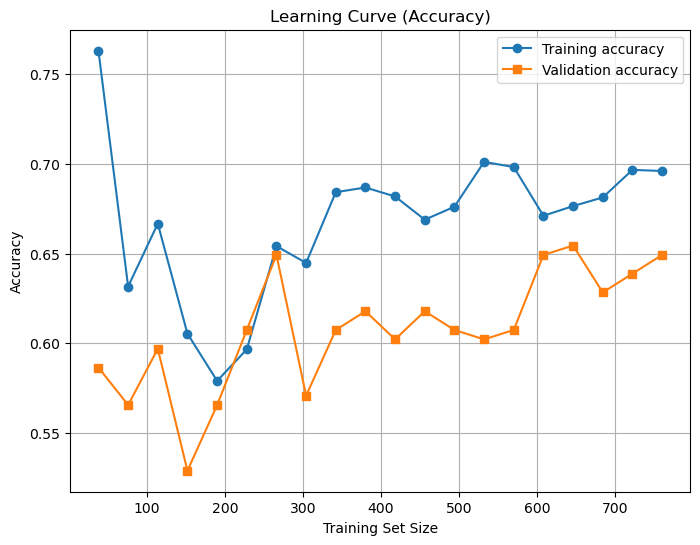

Loss curve


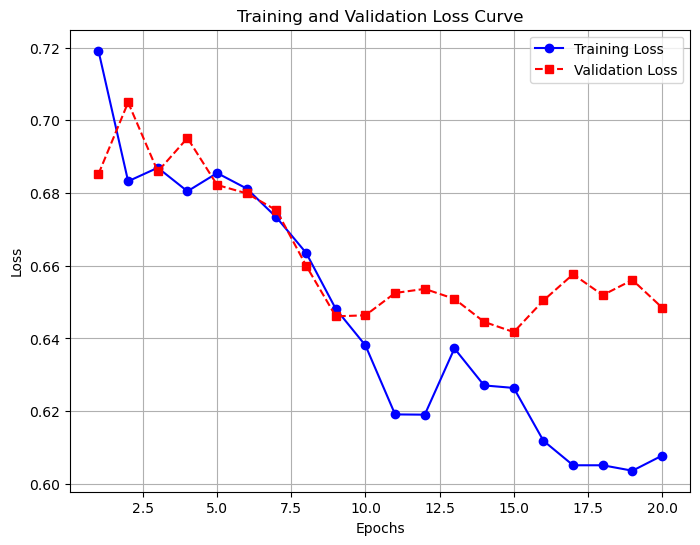

In [59]:
project_root = Path.cwd().parent
sys.path.append(str(project_root)) 
config_path = project_root / "configs" / "nn_spotify.yaml"

trainer = NeuralNetworkTrainer(config_path=config_path, device="cuda")
trainer.train_and_evaluate(debug=True)

# Validation Curve

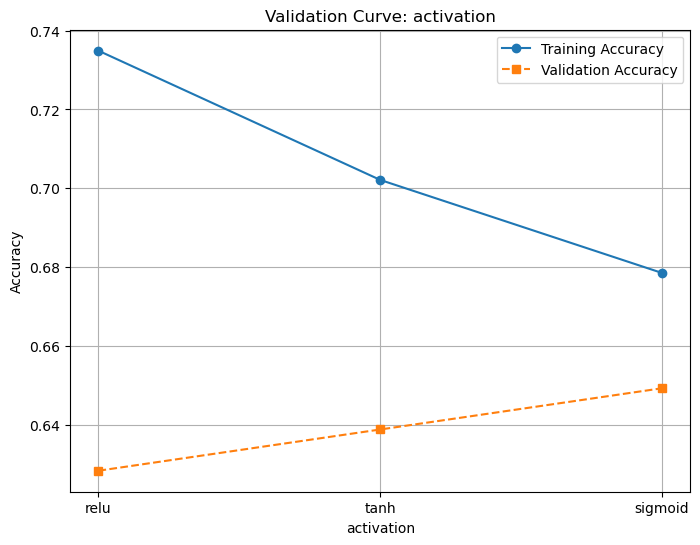

In [58]:
param_grid = {
            "num_layers": [2, 3, 4, 5, 6, 8],
            "hidden_sizes": [64, 128, 256],
            "learning_rate": [0.001, 0.005, 0.01],
            "activation": ["relu", "tanh", "sigmoid"],
            "epochs": [10, 15, 20],
            "batch_size": [32, 64, 128],
            "use_batchnorm": ["True", "False"],
            "dropout_rate": [0.1, 0.2, 0.3, 0.4, 0.5]
        }

project_root = Path.cwd().parent
sys.path.append(str(project_root)) 
config_path = project_root / "configs" / "nn_spotify.yaml"

trainer = NeuralNetworkTrainer(config_path=config_path, device="cuda")
trainer.plot_validation_curve("activation", param_grid)